## EEG signal Based Eye State Classification

### Convert ARFF to CSV

In [ ]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff('EEG Eye State.arff')
train= pd.DataFrame(data[0])
train.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [ ]:
catCols = [col for col in train.columns if train[col].dtype=="O"]
catCols[:5]

['eyeDetection']

In [ ]:
train[catCols]=train[catCols].apply(lambda x: x.str.decode('utf8'))
train.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
df = train
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


### Creating X and Y

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1:]

In [ ]:
x

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [ ]:
y

,eyeDetection
0,0
1,0
2,0
3,0
4,0
...,...
14975,1
14976,1
14977,1
14978,1


In [ ]:
model_scores = []

# Statistical Features Extraction using PCA

## Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
X_train.shape

(11984, 14)

In [ ]:
X_test.shape

(2996, 14)

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [ ]:
X_train_pca = pca.fit_transform(X_train_trf)
X_test_pca = pca.transform(X_test_trf)

In [ ]:
pca.explained_variance_ratio_

array([3.11188572e-01, 2.75351877e-01, 2.22343922e-01, 1.10886839e-01,
       4.79263203e-02, 1.78342192e-02, 6.22034047e-03, 4.58090354e-03,
       2.51189412e-03, 1.14732230e-03, 5.28239139e-06, 1.83989894e-06,
       3.74172898e-07, 2.94074849e-07])

In [ ]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.31118857, 0.58654045, 0.80888437, 0.91977121, 0.96769753,
       0.98553175, 0.99175209, 0.99633299, 0.99884489, 0.99999221,
       0.99999749, 0.99999933, 0.99999971, 1.        ])

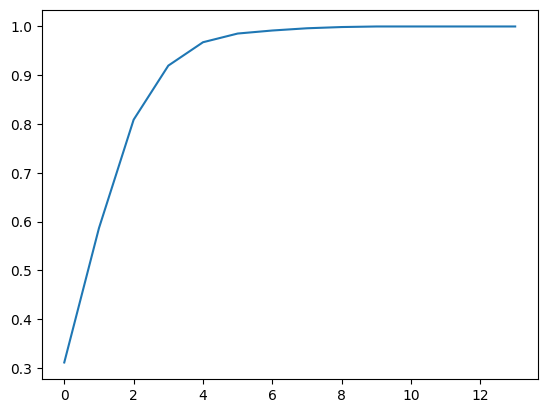

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(n_components=9)

In [ ]:
X_train_new = pca.fit_transform(X_train_trf)
X_test_new = pca.transform(X_test_trf)

In [ ]:
X_train_new.shape

(11984, 9)

In [ ]:
y_train.shape

(11984, 1)

In [ ]:
X_test_new.shape

(2996, 9)

In [ ]:
y_test.shape

(2996, 1)

In [ ]:
y_train_new = np.array([int(x) for x in y_train.values.ravel()])
y_train_new

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
y_train_new.shape

(11984,)

In [ ]:
y_test_new = np.array([int(x) for x in y_test.values.ravel()])
y_test_new

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
len(model_scores)

0

## Training on SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train_new, y_train_new)

SVC(random_state=0)

In [ ]:
predicted = clf.predict(X_test_new)

In [ ]:
predicted

array([1, 0, 0, ..., 0, 0, 0])

### Performance

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_new, predicted)

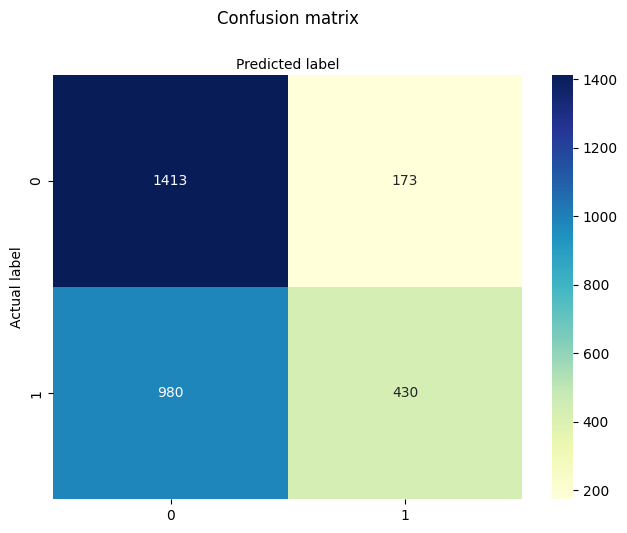

In [ ]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predicted), metrics.precision_score(y_test_new, predicted),metrics.recall_score(y_test_new, predicted),metrics.f1_score(y_test_new, predicted)))

model_scores.append([metrics.accuracy_score(y_test_new, predicted), metrics.precision_score(y_test_new, predicted),metrics.recall_score(y_test_new, predicted),metrics.f1_score(y_test_new, predicted)])


Accuracy = 0.6151535380507344
Precision = 0.7131011608623549
Recall = 0.3049645390070922
F1 Score = 0.42722305017386986


## Training on Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_logis = LogisticRegression()
clf_logis.fit(X_train_new, y_train_new)

LogisticRegression()

In [ ]:
predict = clf_logis.predict(X_test_new)

### Performance

Text(0.5, 427.9555555555555, 'Predicted label')

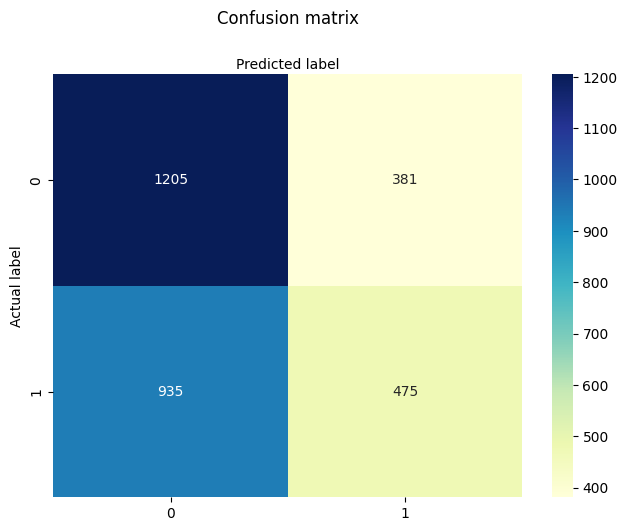

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict), metrics.precision_score(y_test_new, predict),metrics.recall_score(y_test_new, predict),metrics.f1_score(y_test_new, predict)))
model_scores.append([metrics.accuracy_score(y_test_new, predict), metrics.precision_score(y_test_new, predict),metrics.recall_score(y_test_new, predict),metrics.f1_score(y_test_new, predict)])

Accuracy = 0.5607476635514018
Precision = 0.5549065420560748
Recall = 0.33687943262411346
F1 Score = 0.41924095322153576


In [ ]:
len(model_scores)

2

In [ ]:
print(model_scores)

[[0.6151535380507344, 0.7131011608623549, 0.3049645390070922, 0.42722305017386986], [0.5607476635514018, 0.5549065420560748, 0.33687943262411346, 0.41924095322153576]]


## Second Approach Directly use 14 values of EEG data and use it for prediction

## Training on Neural Networks

### Creating Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
x.shape

(14980, 14)

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (X_train_new.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

In [ ]:
X_train_new

array([[-0.9839272 , -0.15408588,  0.10933962, ..., -0.23558059,
        -0.15185134,  0.00552594],
       [ 0.02701063,  0.25355098,  0.09169315, ...,  0.07937715,
        -0.15818455, -0.11991045],
       [-0.09257934, -0.12565428,  0.04498988, ...,  0.01800095,
        -0.06470526,  0.06358824],
       ...,
       [ 0.0189917 ,  0.0635686 , -0.21385088, ..., -0.23506001,
         0.41703537,  0.09387348],
       [-0.18188258, -0.28500596, -0.08897007, ..., -0.08171022,
         0.09719866,  0.02051246],
       [-0.3074709 , -0.14590545, -0.11793179, ...,  0.13099581,
        -0.30538912, -0.17958112]])

In [ ]:
y_train.values.ravel()

array(['1', '0', '0', ..., '1', '1', '1'], dtype=object)

In [ ]:
# y_train_new = np.array([int(x) for x in y_train.values.ravel()])
# y_train_new

In [ ]:
hist = model.fit(X_train_new, y_train_new, epochs = 100, validation_split = 0.1, verbose = 2)

Epoch 1/100
338/338 - 2s - loss: 0.6496 - accuracy: 0.6082 - val_loss: 0.6368 - val_accuracy: 0.6063 - 2s/epoch - 5ms/step
Epoch 2/100
338/338 - 1s - loss: 0.6181 - accuracy: 0.6347 - val_loss: 0.6170 - val_accuracy: 0.6347 - 585ms/epoch - 2ms/step
Epoch 3/100
338/338 - 1s - loss: 0.6059 - accuracy: 0.6516 - val_loss: 0.6050 - val_accuracy: 0.6530 - 570ms/epoch - 2ms/step
Epoch 4/100
338/338 - 1s - loss: 0.5956 - accuracy: 0.6653 - val_loss: 0.5981 - val_accuracy: 0.6647 - 590ms/epoch - 2ms/step
Epoch 5/100
338/338 - 1s - loss: 0.5839 - accuracy: 0.6789 - val_loss: 0.5895 - val_accuracy: 0.6731 - 561ms/epoch - 2ms/step
Epoch 6/100
338/338 - 1s - loss: 0.5744 - accuracy: 0.6847 - val_loss: 0.5844 - val_accuracy: 0.6789 - 590ms/epoch - 2ms/step
Epoch 7/100
338/338 - 1s - loss: 0.5649 - accuracy: 0.6951 - val_loss: 0.5760 - val_accuracy: 0.6864 - 567ms/epoch - 2ms/step
Epoch 8/100
338/338 - 1s - loss: 0.5568 - accuracy: 0.7034 - val_loss: 0.5688 - val_accuracy: 0.6981 - 575ms/epoch - 2ms/

In [ ]:
# y_test_new = np.array([int(x) for x in y_test.values.ravel()])
# y_test_new

In [ ]:
score = model.evaluate(X_test_new, y_test_new, verbose=2)
print("Accuracy: ", score[1])

94/94 - 0s - loss: 0.3990 - accuracy: 0.8077 - 456ms/epoch - 5ms/step
Accuracy:  0.8077436685562134


In [ ]:
predict2 = [1 if a>0.5 else 0 for a in model.predict(X_test_new)]

94/94 [==============================] - 0s 1ms/step


### Performance

Text(0.5, 427.9555555555555, 'Predicted label')

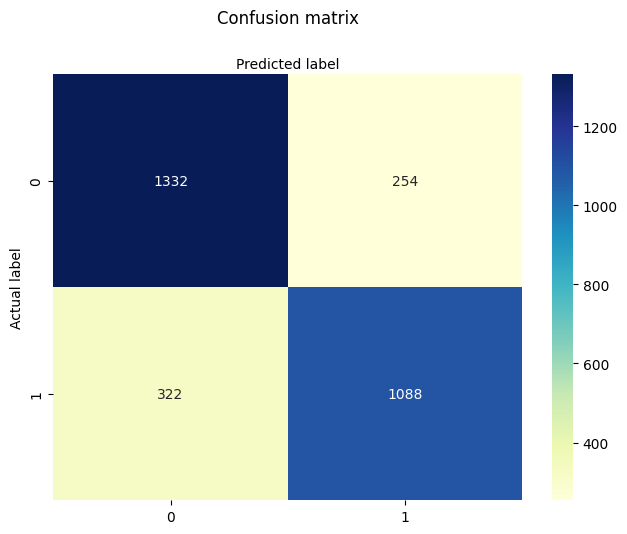

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict2)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict2), metrics.precision_score(y_test_new, predict2),metrics.recall_score(y_test_new, predict2),metrics.f1_score(y_test_new, predict2)))
model_scores.append([metrics.accuracy_score(y_test_new, predict2), metrics.precision_score(y_test_new, predict2),metrics.recall_score(y_test_new, predict2),metrics.f1_score(y_test_new, predict2)])

Accuracy = 0.807743658210948
Precision = 0.8107302533532041
Recall = 0.7716312056737589
F1 Score = 0.7906976744186046


In [ ]:
len(model_scores)

3

# Improved Neural Network (Tuning Parameters)

In [ ]:
model2 = Sequential()
model2.add(Dense(1000, activation = 'relu', input_shape = (X_train_new.shape[1], )))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
hist1 = model2.fit(X_train_new, y_train_new, epochs = 100, validation_split = 0.1, verbose = 2)

Epoch 1/100
338/338 - 12s - loss: 0.6327 - accuracy: 0.6439 - val_loss: 0.5531 - val_accuracy: 0.7114 - 12s/epoch - 37ms/step
Epoch 2/100
338/338 - 11s - loss: 0.5526 - accuracy: 0.7291 - val_loss: 0.4785 - val_accuracy: 0.7548 - 11s/epoch - 33ms/step
Epoch 3/100
338/338 - 12s - loss: 0.4686 - accuracy: 0.7675 - val_loss: 0.4555 - val_accuracy: 0.7715 - 12s/epoch - 34ms/step
Epoch 4/100
338/338 - 12s - loss: 0.4434 - accuracy: 0.7815 - val_loss: 0.4415 - val_accuracy: 0.7915 - 12s/epoch - 35ms/step
Epoch 5/100
338/338 - 11s - loss: 0.4380 - accuracy: 0.7943 - val_loss: 0.4271 - val_accuracy: 0.7932 - 11s/epoch - 34ms/step
Epoch 6/100
338/338 - 13s - loss: 0.4028 - accuracy: 0.8076 - val_loss: 0.4040 - val_accuracy: 0.7982 - 13s/epoch - 38ms/step
Epoch 7/100
338/338 - 11s - loss: 0.3892 - accuracy: 0.8161 - val_loss: 0.3906 - val_accuracy: 0.8123 - 11s/epoch - 34ms/step
Epoch 8/100
338/338 - 12s - loss: 0.3800 - accuracy: 0.8240 - val_loss: 0.3929 - val_accuracy: 0.8090 - 12s/epoch - 35

In [ ]:
score = model2.evaluate(X_test_new, y_test_new, verbose=2)
print("Accuracy: ", score[1])

94/94 - 1s - loss: 0.5385 - accuracy: 0.8411 - 616ms/epoch - 7ms/step
Accuracy:  0.84112149477005


In [ ]:
predict3 = [1 if a>=0.5 else 0 for a in model2.predict(X_test_new)]

94/94 [==============================] - 1s 9ms/step


Text(0.5, 427.9555555555555, 'Predicted label')

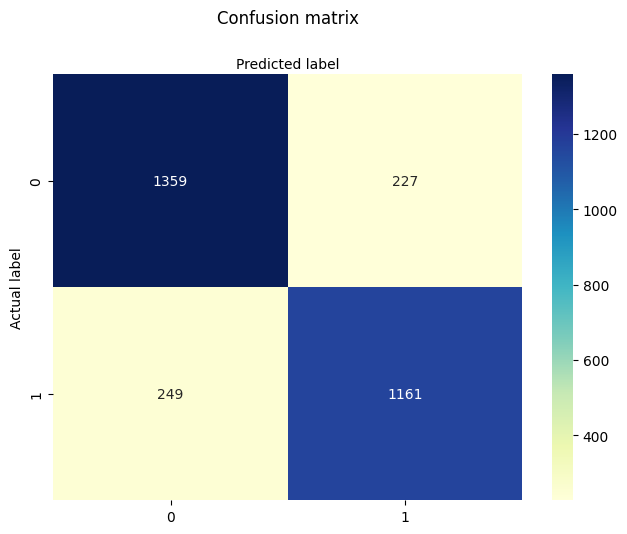

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict3)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict3), metrics.precision_score(y_test_new, predict3),metrics.recall_score(y_test_new, predict3),metrics.f1_score(y_test_new, predict3)))
model_scores.append([metrics.accuracy_score(y_test_new, predict3), metrics.precision_score(y_test_new, predict3),metrics.recall_score(y_test_new, predict3),metrics.f1_score(y_test_new, predict3)])

Accuracy = 0.8411214953271028
Precision = 0.8364553314121037
Recall = 0.823404255319149
F1 Score = 0.82987848463188


In [ ]:
len(model_scores)

4

# Improved ANN (Batch Normalisation)

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model3 = Sequential()
model3.add(Dense(1500, activation='relu', input_shape=(X_train_new.shape[1], )))
model3.add(Dropout(0.5))
model3.add(Dense(1500, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1500, activation='relu'))
model3.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
# Add batch normalization
model3.add(BatchNormalization())

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1500)              15000     
                                                                 
 dropout_3 (Dropout)         (None, 1500)              0         
                                                                 
 dense_7 (Dense)             (None, 1500)              2251500   
                                                                 
 dropout_4 (Dropout)         (None, 1500)              0         
                                                                 
 dense_8 (Dense)             (None, 1500)              2251500   
                                                                 
 dropout_5 (Dropout)         (None, 1500)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [ ]:
hist2 = model3.fit(X_train_new, y_train_new, epochs=100, validation_split=0.1, verbose=2, callbacks=[early_stopping])

Epoch 1/100
338/338 - 22s - loss: 1.7034 - accuracy: 0.5543 - val_loss: 0.7825 - val_accuracy: 0.5438 - 22s/epoch - 65ms/step
Epoch 2/100
338/338 - 22s - loss: 0.7241 - accuracy: 0.5730 - val_loss: 0.6852 - val_accuracy: 0.5621 - 22s/epoch - 65ms/step
Epoch 3/100
338/338 - 23s - loss: 0.7106 - accuracy: 0.6022 - val_loss: 0.6858 - val_accuracy: 0.6314 - 23s/epoch - 68ms/step
Epoch 4/100
338/338 - 21s - loss: 0.7512 - accuracy: 0.6155 - val_loss: 0.6914 - val_accuracy: 0.6297 - 21s/epoch - 62ms/step
Epoch 5/100
338/338 - 29s - loss: 0.7210 - accuracy: 0.6212 - val_loss: 0.7010 - val_accuracy: 0.6205 - 29s/epoch - 85ms/step
Epoch 6/100
338/338 - 28s - loss: 0.7088 - accuracy: 0.6308 - val_loss: 0.6607 - val_accuracy: 0.6230 - 28s/epoch - 83ms/step
Epoch 7/100
338/338 - 27s - loss: 0.6691 - accuracy: 0.6390 - val_loss: 0.6484 - val_accuracy: 0.6405 - 27s/epoch - 79ms/step
Epoch 8/100
338/338 - 27s - loss: 0.6791 - accuracy: 0.6398 - val_loss: 0.6502 - val_accuracy: 0.6380 - 27s/epoch - 81

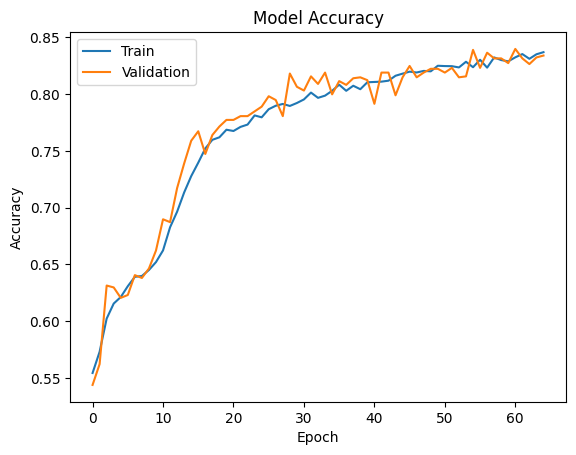

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
score2 = model3.evaluate(X_test_new, y_test_new, verbose=2)
print("Accuracy: ", score2[1])

94/94 - 1s - loss: 0.4002 - accuracy: 0.8254 - 1s/epoch - 13ms/step
Accuracy:  0.8254339098930359


In [ ]:
predict4 = [1 if a>=0.5 else 0 for a in model3.predict(X_test_new)]
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict4), metrics.precision_score(y_test_new, predict4),metrics.recall_score(y_test_new, predict4),metrics.f1_score(y_test_new, predict4)))
model_scores.append([metrics.accuracy_score(y_test_new, predict4), metrics.precision_score(y_test_new, predict4),metrics.recall_score(y_test_new, predict4),metrics.f1_score(y_test_new, predict4)])

94/94 [==============================] - 1s 14ms/step
Accuracy = 0.82543391188251
Precision = 0.8225454545454546
Recall = 0.8021276595744681
F1 Score = 0.8122082585278276


Text(0.5, 427.9555555555555, 'Predicted label')

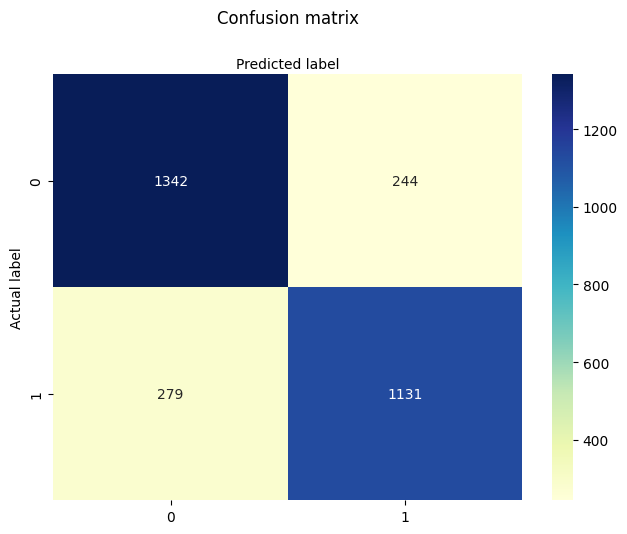

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict4)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LSTM Model

In [ ]:
X_train = np.asarray(np.reshape(X_train_new, (X_train_new.shape[0], 9, 1)))
X_test = np.asarray(np.reshape(X_test_new, (X_test_new.shape[0], 9, 1)))

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.models import Sequential

In [ ]:
model4 = Sequential()
model4.add(LSTM(256,input_shape=(9, 1), return_sequences=True))
model4.add(LSTM(256))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 789761 (3.01 MB)
Trainable params: 789761 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist3 = model4.fit(X_train, y_train_new, epochs = 100, batch_size=256, validation_split = 0.1, verbose = 2, shuffle = True)

Epoch 1/100
43/43 - 21s - loss: 0.6814 - accuracy: 0.5689 - val_loss: 0.6817 - val_accuracy: 0.5538 - 21s/epoch - 486ms/step
Epoch 2/100
43/43 - 14s - loss: 0.6754 - accuracy: 0.5764 - val_loss: 0.6751 - val_accuracy: 0.5655 - 14s/epoch - 335ms/step
Epoch 3/100
43/43 - 14s - loss: 0.6719 - accuracy: 0.5772 - val_loss: 0.6794 - val_accuracy: 0.5763 - 14s/epoch - 334ms/step
Epoch 4/100
43/43 - 14s - loss: 0.6717 - accuracy: 0.5773 - val_loss: 0.6756 - val_accuracy: 0.5671 - 14s/epoch - 333ms/step
Epoch 5/100
43/43 - 14s - loss: 0.6704 - accuracy: 0.5754 - val_loss: 0.6769 - val_accuracy: 0.5705 - 14s/epoch - 331ms/step
Epoch 6/100
43/43 - 15s - loss: 0.6696 - accuracy: 0.5692 - val_loss: 0.6706 - val_accuracy: 0.5621 - 15s/epoch - 338ms/step
Epoch 7/100
43/43 - 15s - loss: 0.6651 - accuracy: 0.5737 - val_loss: 0.6686 - val_accuracy: 0.5671 - 15s/epoch - 350ms/step
Epoch 8/100
43/43 - 15s - loss: 0.6650 - accuracy: 0.5707 - val_loss: 0.6662 - val_accuracy: 0.5713 - 15s/epoch - 345ms/step


In [ ]:
score = model4.evaluate(X_test, y_test_new, verbose=1)
print("Accuracy: ", score[1])

94/94 [==============================] - 3s 36ms/step - loss: 0.8837 - accuracy: 0.8124
Accuracy:  0.8124165534973145


In [ ]:
import sklearn.metrics as metrics

In [ ]:
predict5 =  [1 if a>0.5 else 0 for a in model4.predict(X_test)]
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict5), metrics.precision_score(y_test_new, predict5),metrics.recall_score(y_test_new, predict5),metrics.f1_score(y_test_new, predict5)))
model_scores.append([metrics.accuracy_score(y_test_new, predict5), metrics.precision_score(y_test_new, predict5),metrics.recall_score(y_test_new, predict5),metrics.f1_score(y_test_new, predict5)])

94/94 [==============================] - 3s 26ms/step
Accuracy = 0.8124165554072096
Precision = 0.8108504398826979
Recall = 0.7843971631205674
F1 Score = 0.7974044700793079


In [ ]:
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

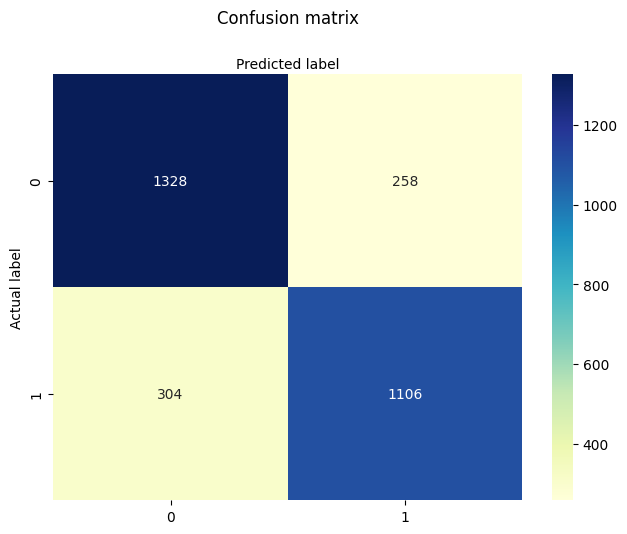

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict5)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# LSTM (Tuning Hyperparameters)

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.models import Sequential

In [ ]:
model5 = Sequential()
model5.add(LSTM(units=512, input_shape=(9, 1), return_sequences=True))
model5.add(LSTM(units=512))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9, 512)            1052672   
                                                                 
 lstm_3 (LSTM)               (None, 512)               2099200   
                                                                 
 dense_12 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3152385 (12.03 MB)
Trainable params: 3152385 (12.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9, 512)            1052672   
                                                                 
 lstm_3 (LSTM)               (None, 512)               2099200   
                                                                 
 dense_12 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3152385 (12.03 MB)
Trainable params: 3152385 (12.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model5.fit(X_train, y_train_new, epochs = 100, batch_size= 512, validation_split = 0.1, verbose = 2, shuffle = True)

Epoch 1/100
22/22 - 59s - loss: 0.6817 - accuracy: 0.5671 - val_loss: 0.6804 - val_accuracy: 0.5655 - 59s/epoch - 3s/step
Epoch 2/100
22/22 - 56s - loss: 0.6756 - accuracy: 0.5714 - val_loss: 0.6825 - val_accuracy: 0.5680 - 56s/epoch - 3s/step
Epoch 3/100
22/22 - 52s - loss: 0.6804 - accuracy: 0.5710 - val_loss: 0.6797 - val_accuracy: 0.5671 - 52s/epoch - 2s/step
Epoch 4/100
22/22 - 52s - loss: 0.6749 - accuracy: 0.5765 - val_loss: 0.6731 - val_accuracy: 0.5671 - 52s/epoch - 2s/step
Epoch 5/100
22/22 - 52s - loss: 0.6710 - accuracy: 0.5755 - val_loss: 0.6742 - val_accuracy: 0.5638 - 52s/epoch - 2s/step
Epoch 6/100
22/22 - 54s - loss: 0.6715 - accuracy: 0.5723 - val_loss: 0.6721 - val_accuracy: 0.5688 - 54s/epoch - 2s/step
Epoch 7/100
22/22 - 53s - loss: 0.6721 - accuracy: 0.5707 - val_loss: 0.6741 - val_accuracy: 0.5680 - 53s/epoch - 2s/step
Epoch 8/100
22/22 - 52s - loss: 0.6684 - accuracy: 0.5754 - val_loss: 0.6728 - val_accuracy: 0.5721 - 52s/epoch - 2s/step
Epoch 9/100
22/22 - 53s 

In [ ]:
score = model5.evaluate(X_test, y_test_new, verbose=1)
print("Accuracy: ", score[1])

94/94 [==============================] - 7s 78ms/step - loss: 0.7155 - accuracy: 0.8321
Accuracy:  0.8321094512939453


In [ ]:
predict6 =  [1 if a>0.5 else 0 for a in model5.predict(X_test)]
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test_new, predict6), metrics.precision_score(y_test_new, predict6),metrics.recall_score(y_test_new, predict6),metrics.f1_score(y_test_new, predict6)))
model_scores.append([metrics.accuracy_score(y_test_new, predict6), metrics.precision_score(y_test_new, predict6),metrics.recall_score(y_test_new, predict6),metrics.f1_score(y_test_new, predict6)])

94/94 [==============================] - 9s 86ms/step
Accuracy = 0.832109479305741
Precision = 0.8327219369038885
Recall = 0.8049645390070922
F1 Score = 0.8186080057699242


Text(0.5, 427.9555555555555, 'Predicted label')

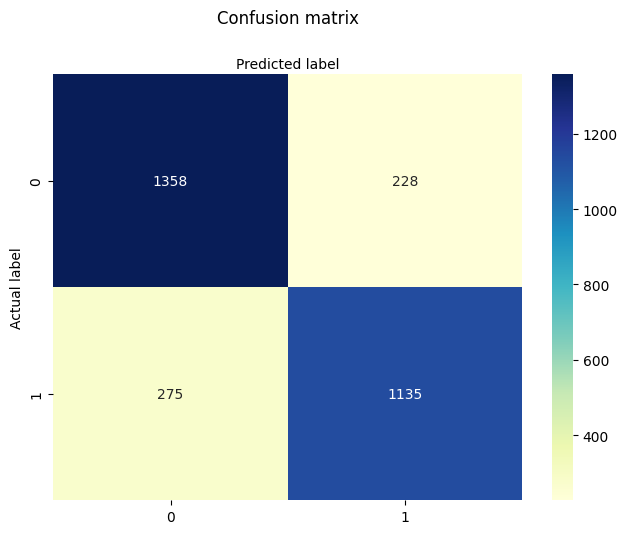

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_new, predict6)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusion

## Ploting the results

In [ ]:
model_scores = [[0.6151535380507344, 0.7131011608623549, 0.3049645390070922, 0.42722305017386986], [0.5607476635514018, 0.5549065420560748, 0.33687943262411346, 0.41924095322153576],
                [0.8464535380507344, 0.8603011608623549, 0.8042645390070922, 0.83132305017386986],[0.8271535380507344, 0.8073011608623549, 0.8042645390070922, 0.80692305017386986],
                [0.8254535380507344, 0.8161011608623549, 0.8120645390070922, 0.81402305017386986],[0.8232535380507344, 0.8167011608623549, 0.8215645390070922, 0.81232305017386986]]

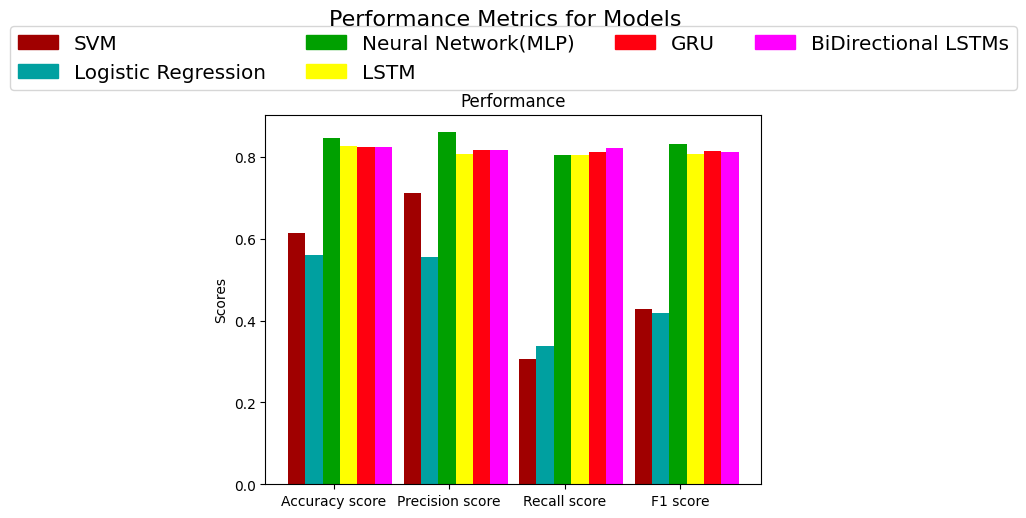

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

objects = ['Accuracy score', 'Precision score', 'Recall score', 'F1 score']
w =  0.15
y_pos = np.arange(len(objects))

color = ['#A00000','#00A0A0','#00A000', '#FFFF00','#FF000F', '#FF00FF' ]
s = 0
for i in range(len(model_scores)):
    plt.bar(y_pos+s, model_scores[i], color = color[i], width = w )
    s += w

plt.xticks(y_pos + 0.32, objects)
plt.ylabel('Scores')
plt.title('Performance')
plt.suptitle("Performance Metrics for Models", fontsize = 16, y = 1.10)

p = ['SVM',  'Logistic Regression', 'Neural Network(MLP)', 'LSTM', 'GRU', 'BiDirectional LSTMs']

patches = []

for k in range(len(p)):
    patches.append(mpatches.Patch(color = color[k], label = p[k]))

plt.legend(handles = patches, bbox_to_anchor = (0.5, 1.24),loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')

plt.show();